In [7]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

Processing ./mlrose
  Preparing metadata (setup.py) ... done
  Created wheel for mlrose_hiive: filename=mlrose_hiive-2.2.4-py3-none-any.whl size=122045 sha256=46fb0c16c6822e5c128b1caee0705d89d68ca23e5476540278a73a37de3ef4a9
  Stored in directory: /private/var/folders/c6/5zg6wy5n121f2pzclkwbzplm0000gn/T/pip-ephem-wheel-cache-opoayzn3/wheels/77/c5/de/7a63a2c78a12ad335a5091a9209439e12d86616744464a5ae4
Successfully built mlrose_hiive
  Attempting uninstall: mlrose_hiive
    Found existing installation: mlrose_hiive 2.2.4
    Uninstalling mlrose_hiive-2.2.4:
      Successfully uninstalled mlrose_hiive-2.2.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import mlrose_hiive as mh

In [2]:
help(mh.runners)

Help on package mlrose_hiive.runners in mlrose_hiive:

NAME
    mlrose_hiive.runners - Classes for running optimization problems.

PACKAGE CONTENTS
    _nn_runner_base
    _runner_base
    ga_border_check_runner
    ga_js_runner
    ga_runner
    mimic_runner
    nngs_runner
    rhc_runner
    sa_runner
    skmlp_runner
    utils

FILE
    /Users/qingchuanlyu/anaconda3/envs/cs7641/lib/python3.10/site-packages/mlrose_hiive/runners/__init__.py




In [3]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [4]:
import pandas as pd

In [5]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [6]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=3, tasks=[
    Task('A', 2, 5, 50),
    Task('B', 3, 8, 70),
    Task('C', 1, 4, 40),
], break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [7]:
problem_ffp.length

3

In [8]:
problem_ffp.fitness

110.0

In [9]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[2, 4, 5],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [10]:
df_run_curves_ffp.shape

(3663, 7)

In [11]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000363,140.0,0.0,2,0.1,2048
1,1,0.008287,140.0,1.0,2,0.1,2048
2,2,0.014718,140.0,2.0,2,0.1,2048
3,3,0.018662,140.0,3.0,2,0.1,2048
4,4,0.019002,140.0,4.0,2,0.1,2048


In [12]:
df_run_curves_ffp['Fitness'].max()

180.0

In [14]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
458,458,0.494749,180.0,460.0,2,0.1,2048
459,459,0.495879,180.0,461.0,2,0.1,2048
460,460,0.496712,180.0,462.0,2,0.1,2048
461,461,0.497427,180.0,463.0,2,0.1,2048
462,462,0.499199,180.0,464.0,2,0.1,2048
...,...,...,...,...,...,...,...
3157,649,0.642019,180.0,651.0,5,0.1,2048
3158,650,0.643390,180.0,652.0,5,0.1,2048
3159,651,0.644499,180.0,653.0,5,0.1,2048
3160,652,0.645125,180.0,654.0,5,0.1,2048


In [15]:
# need to check Time and FEvals

In [17]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [18]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
458,458,0.494749,180.0,460.0,2,0.1,2048
459,459,0.495879,180.0,461.0,2,0.1,2048
460,460,0.496712,180.0,462.0,2,0.1,2048
461,461,0.497427,180.0,463.0,2,0.1,2048
462,462,0.499199,180.0,464.0,2,0.1,2048
...,...,...,...,...,...,...,...
3157,649,0.642019,180.0,651.0,5,0.1,2048
3158,650,0.643390,180.0,652.0,5,0.1,2048
3159,651,0.644499,180.0,653.0,5,0.1,2048
3160,652,0.645125,180.0,654.0,5,0.1,2048


In [19]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,2,0.10,460.0,708.0,0.494749
1,4,0.08,25.0,273.0,0.040284
2,4,0.10,25.0,273.0,0.040284
3,5,0.10,155.0,403.0,0.141008


In [72]:
# tentatively, pick pop size = 4 and mutation_rate = 0.08, with best iteration and time

In [20]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000363,140.0,0.0,2,0.1,2048
1,1,0.008287,140.0,1.0,2,0.1,2048
2,2,0.014718,140.0,2.0,2,0.1,2048
3,3,0.018662,140.0,3.0,2,0.1,2048
4,4,0.019002,140.0,4.0,2,0.1,2048


In [21]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [22]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[4], # 20 bits in total
              mutation_rates=[0.08])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [23]:
df_iter_curves_ffp.shape

(5664, 7)

In [24]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.001108,140.0,0.0,4,0.08,2048
1,1,0.015194,140.0,1.0,4,0.08,2048
2,2,0.024125,140.0,2.0,4,0.08,2048
3,3,0.028671,140.0,3.0,4,0.08,2048
4,4,0.029847,140.0,4.0,4,0.08,2048


In [30]:
df_iter_curves_ffp.Fitness.max()

180.0

In [1]:
#df_iter_curves_ffp.to_csv('ga_js_3.csv')
import pandas as pd
import numpy as np
df_iter_curves_ffp=pd.read_csv('../../csv-files/ga_js_3.csv')

In [26]:
df_iter_curves_ffp.Iteration.max()

733

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [28]:
df_fitness_iter_ffp.shape

(734, 3)

In [29]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,119.0,721.111111
1,1,152.0,373.333333
2,2,152.0,373.333333
3,3,152.0,373.333333
4,4,154.0,448.888889


In [31]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

23      23
24      24
25      25
26      26
27      27
      ... 
507    507
508    508
509    509
510    510
511    511
Name: Iteration, Length: 4509, dtype: int64

In [32]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

501

In [3]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [36]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,119.0,721.111111,26.853512
1,1,152.0,373.333333,19.321836
2,2,152.0,373.333333,19.321836
3,3,152.0,373.333333,19.321836
4,4,154.0,448.888889,21.186998


Text(0, 0.5, 'Fitness')

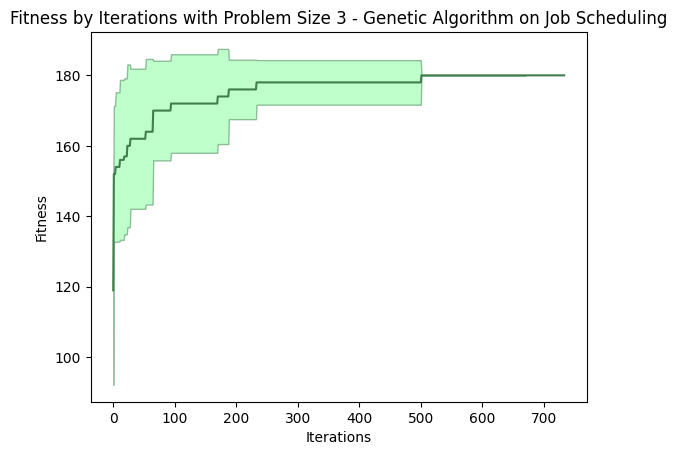

In [37]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Fitness by Iterations with Problem Size 3 - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [4]:
df_fitness_iter_ffp[df_fitness_iter_ffp['stddev_fitness'] > 10]

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,119.0,721.111111,26.853512
1,1,152.0,373.333333,19.321836
2,2,152.0,373.333333,19.321836
3,3,152.0,373.333333,19.321836
4,4,154.0,448.888889,21.186998
...,...,...,...,...
183,183,174.0,182.222222,13.498971
184,184,174.0,182.222222,13.498971
185,185,174.0,182.222222,13.498971
186,186,174.0,182.222222,13.498971


In [38]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    178.0
Name: avg_fitness, dtype: float64

In [39]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(6.32455532033676, 6.32455532033676)

In [40]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(233, 500)

In [42]:
df_fitness_iter_ffp.stddev_fitness.max()

26.853512081497108

In [45]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

23.094010767585033

In [46]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [43]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

23    23
24    24
25    25
26    26
27    27
Name: Iteration, dtype: int64

In [123]:
# Fevals - iteration

In [6]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [8]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == 501]

,Iteration,avg_FEvals,var_FEvals
501,501,502.888889,0.361111


In [48]:
df_FEvals_iter_ffp.shape

(734, 3)

In [49]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.6,0.266667
2,2,2.6,0.266667
3,3,3.6,0.266667
4,4,4.7,0.455556


In [50]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [51]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 0.8232726023485709)

In [52]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.6,0.266667,0.516398
2,2,2.6,0.266667,0.516398
3,3,3.6,0.266667,0.516398
4,4,4.7,0.455556,0.674949


Text(0, 0.5, 'FEvals')

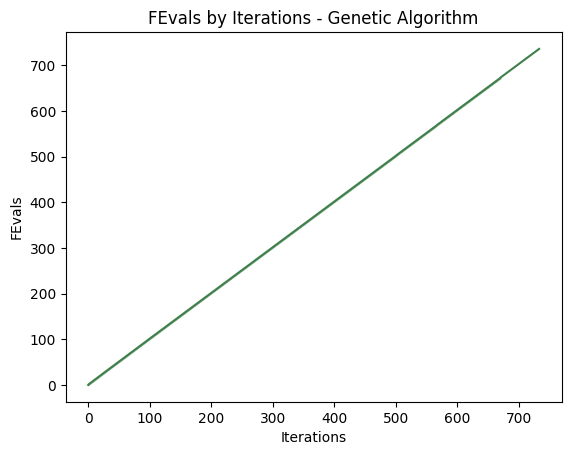

In [53]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [54]:
# fitness - wall clock time

In [55]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [56]:
df_time_iter_ffp.shape

(734, 3)

In [57]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000909,8.955699e-07
1,1,0.009308,1.150706e-05
2,2,0.022523,3.599933e-04
3,3,0.038168,1.939670e-03
4,4,0.039754,2.017837e-03


In [58]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [59]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000909,8.955699e-07,0.000946
1,1,0.009308,1.150706e-05,0.003392
2,2,0.022523,3.599933e-04,0.018973
3,3,0.038168,1.939670e-03,0.044042
4,4,0.039754,2.017837e-03,0.044920


Text(0, 0.5, 'Time')

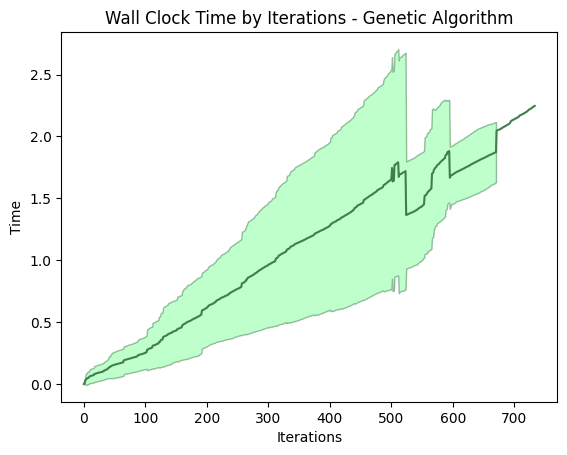

In [60]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [63]:
df_time_iter_ffp.stddev_time.max()

0.9555428704560747

In [65]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,1.745865,0.799476,0.894134


In [64]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

523    523
Name: Iteration, dtype: int64

In [ ]:
# maybe look at how std dev decrease in bulks